<a href="https://colab.research.google.com/github/BRIJNANDA1979/CNN-Sentinel/blob/master/Merge_bands_RGB_NIR_and_SWIR_of_BigEarthNet_using_Rasterio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Resding Raster with stats 
#https://automating-gis-processes.github.io/CSC18/lessons/L6/reading-raster.html


In [2]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 51.6MB/s 


In [3]:
import rasterio

In [4]:
#Plot Bands https://automating-gis-processes.github.io/CSC18/lessons/L6/plotting-raster.html
from rasterio.plot import show
from rasterio.plot import show_hist

In [5]:
#Create RGB 432 bands geotiff and 83 & 12 bands geotiff

In [6]:
#read Band 2 Blue
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B02.tif'
data_band2 = rasterio.open(path)
print(data_band2.dtypes)
print(type(data_band2))

('uint16',)
<class 'rasterio.io.DatasetReader'>


In [7]:
#read band 3 Green
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B03.tif'
data_band3 = rasterio.open(path)

In [8]:
#Read band 4 REd
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B04.tif'
data_band4 = rasterio.open(path)

In [9]:
# Read band 12 SWIR
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B12.tif'
data_band12 = rasterio.open(path)

In [10]:
# Read band 8 NIR
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B08.tif'
data_band8 = rasterio.open(path)

	Band 2 Blue


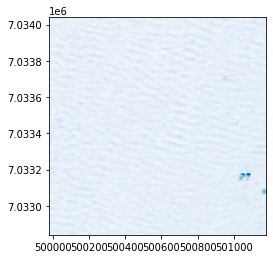

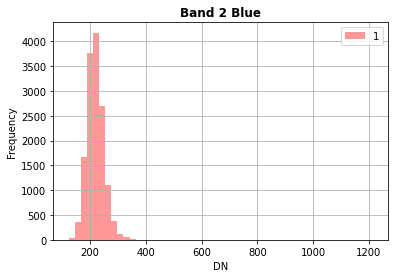

In [11]:
print('\tBand 2 Blue')
show(data_band2,cmap='Blues')
show_hist(data_band2,title='Band 2 Blue',bins=50,histtype='stepfilled',alpha=0.4)

	 Band 3 Green


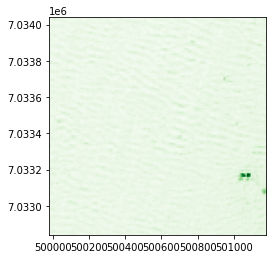

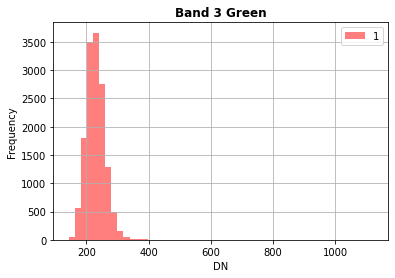

In [12]:
print('\t Band 3 Green')
show(data_band3,cmap='Greens')
show_hist(data_band3,title='Band 3 Green',bins=50,histtype='stepfilled',alpha=0.5)

	 Band 4 Red


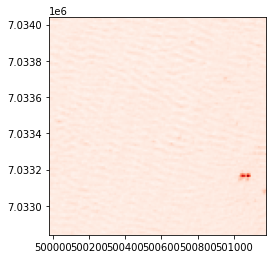

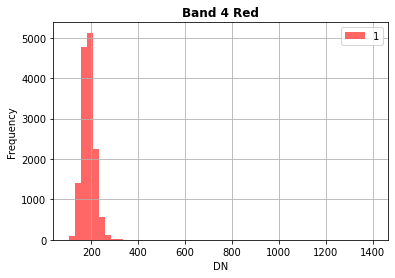

In [13]:
print('\t Band 4 Red')
show(data_band4,cmap='Reds')
show_hist(data_band4,title='Band 4 Red',histtype='stepfilled',bins=50,alpha=0.6)

	 Band 8 NIR


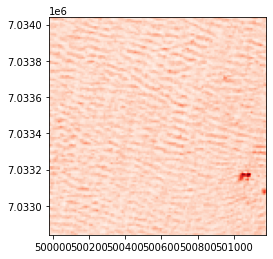

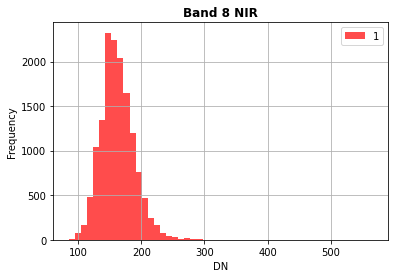

In [14]:
print('\t Band 8 NIR')
show(data_band8,cmap='Reds')
show_hist(data_band8,title='Band 8 NIR',bins=50,histtype='stepfilled',alpha=0.7)

	 Band 12 SWIR


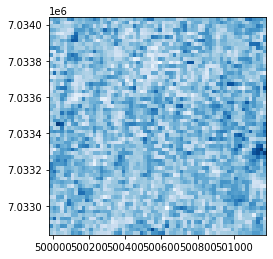

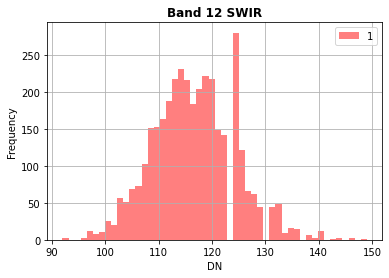

In [15]:
print('\t Band 12 SWIR')
show(data_band12,cmap='Blues')
show_hist(data_band12,bins=50,title='Band 12 SWIR',histtype='stepfilled',alpha=0.5)

# **Create Mosaic**

In [16]:
#https://gis.stackexchange.com/questions/223910/using-rasterio-or-gdal-to-stack-multiple-bands-without-using-subprocess-commands
import os
import glob
from rasterio import merge

In [17]:
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55'
search = '*B*.tif'
files_batch = glob.glob(os.path.join(path,search))
print(files_batch)
print(len(files_batch))

['/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B03.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B07.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B04.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B02.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B8A.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B12.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B08.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B11.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B09.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T1

<open DatasetWriter name='/content/drive/MyDrive/Big/stack.tif' mode='w'>
1 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B03.tif
2 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B07.tif
3 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B04.tif
4 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B02.tif
5 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B8A.tif
6 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B12.tif
7 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B08.tif
8 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B11.tif
9 /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B09.tif
10 /content/drive

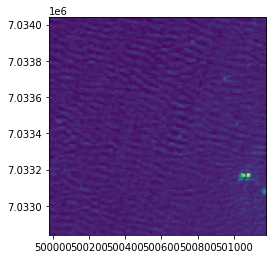

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 120, 'height': 120, 'count': 12, 'crs': CRS.from_epsg(32634), 'transform': Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 7034040.0)}
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 20, 'height': 20, 'count': 1, 'crs': CRS.from_epsg(32634), 'transform': Affine(60.0, 0.0, 499980.0,
       0.0, -60.0, 7034040.0)}


In [23]:
# Read metadata of first file
with rasterio.open(files_batch[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers in merged output geotiff file
meta.update(count = len(files_batch))

# Read each layer and write it to stack
with rasterio.open('/content/drive/MyDrive/Big/stack.tif', 'w', **meta) as dst:
    print(dst)
    for id, layer in enumerate(files_batch, start=1): #list of tuples
        print(id,layer)
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1)) #read 1 band at a time
stacked_data = rasterio.open('/content/drive/MyDrive/Big/stack.tif')
print('Output geotiff number of bands',stacked_data.count)
show(stacked_data)
print(stacked_data.meta)
